In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

from polWave import PolWave

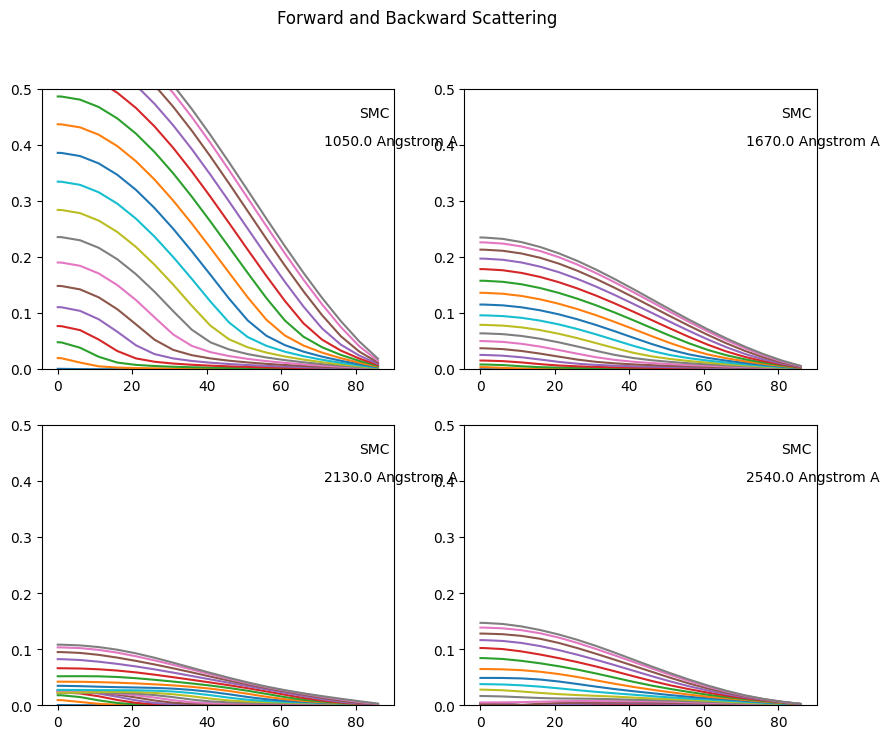

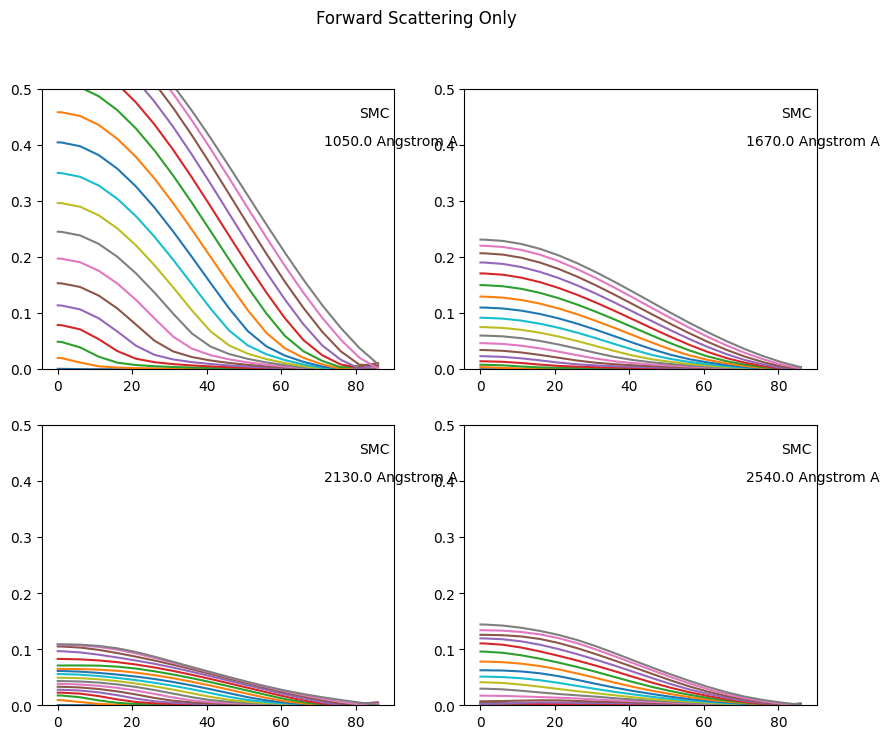

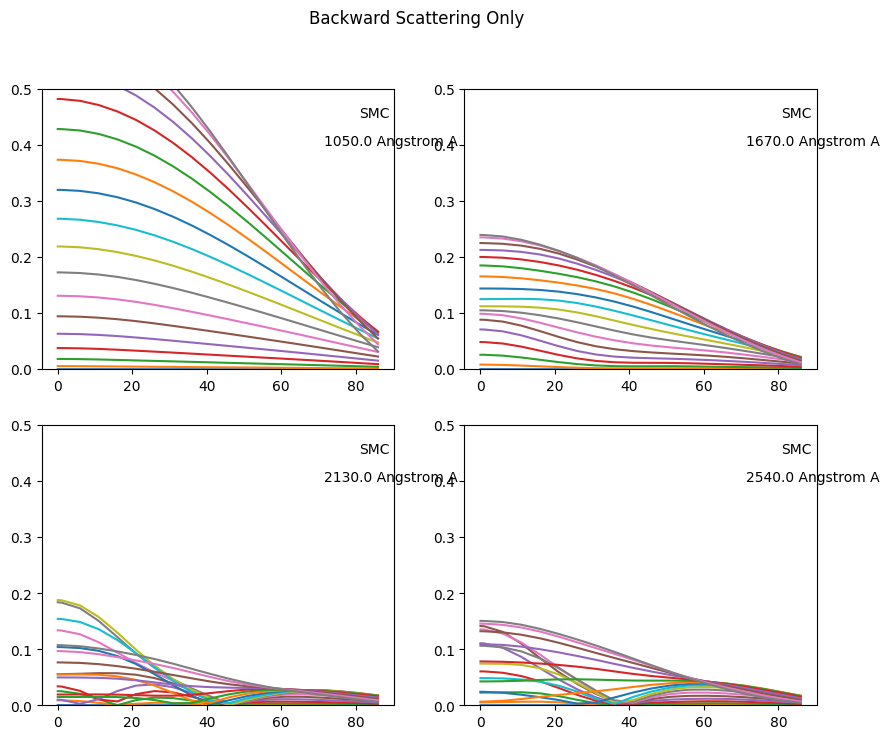

In [4]:
lam_targs = np.array([1050., 1670., 2130., 2540.])*u.AA
dust_model = "SMC"
for n in range(3):
    if n==0:
        fw=True
        bw=True
        title="Forward and Backward Scattering"
    elif n==1:
        fw=True
        bw=False
        title="Forward Scattering Only"
    else:
        fw=False
        bw=True
        title="Backward Scattering Only"

    model = PolWave(dust_model, fw=fw, bw=bw)

    fig, axs = plt.subplots(2,2,figsize=(10,8))
    for i, lam_targ in enumerate(lam_targs):
        ax = axs[int(i/2),i-int(i/2)*2]
        for th in model.theta_grid:
            ax.plot(model.psi_grid, np.abs(model.p((lam_targ*np.ones(model.psi_grid.shape), th*np.ones(model.psi_grid.shape), model.psi_grid))))
        ax.set_ylim([0,0.5])
        ax.text(0.9,0.9,dust_model,transform=ax.transAxes)
        ax.text(0.8,0.8,"{} A".format(lam_targ), transform=ax.transAxes)
    fig.suptitle(title)
    plt.show()